### Classify the email using the binary classification method. 
### Email Spam detection has two states: 
   ### a) Normal State – Not Spam, 
   ### b) Abnormal State – Spam. 
   ### c)Use K-Nearest Neighbors and
   ### d)Support Vector Machine for classification. 
   ### e)Analyze their performance.
### Dataset link: The emails.csv dataset on the Kaggle
### https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head

<bound method NDFrame.head of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastru

In [5]:
#imput data
x = df.drop(['Email No.','Prediction'],axis=1)

#output data
y = df['Prediction']

In [6]:
x.shape


(5172, 3000)

In [7]:
y.shape

(5172,)

In [8]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [9]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [10]:
# Scaling the values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
#cross_Validation
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,t_test = train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [14]:
x_scaled.shape

(5172, 3000)

In [15]:
X_train.shape

(3879, 3000)

In [16]:
x_test.shape

(1293, 3000)

In [17]:
# Knn algoritham

#import Calss
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [20]:
#predict on test data
y_pred = knn.predict(x_test)

In [21]:
#imoort the evalution metrics
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

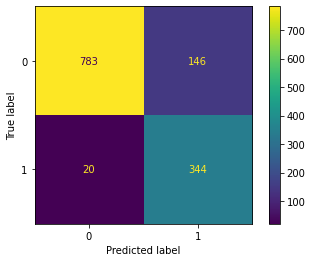

In [22]:
conf_matrix=ConfusionMatrixDisplay.from_predictions(t_test,y_pred)

In [23]:
t_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [24]:
accuracy_score(t_test,y_pred)

0.871616395978345

In [25]:
print(classification_report(t_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(kernel = 'linear')

In [28]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [29]:
y_pred = svm.predict(x_test)

In [30]:
accuracy = accuracy_score(t_test,y_pred)
accuracy

0.9767981438515081

In [31]:
error_rate = 1-accuracy

In [32]:
error_rate

0.023201856148491906